<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_salud/blob/main/b_exploracion_limpieza_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación del notebook

## Cargar librerías

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import math


from scipy.stats import zscore, shapiro, kstest, anderson

In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.6 MB/s eta 0:00:00


In [ ]:
# Eliminar Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Instalar git en Colab si no está instalado
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


## Clonar Repositorio Salud


In [ ]:
# Clonar el repositorio de GitHub
!git clone https://github.com/DanielMerkdo/analitica_salud.git

Cloning into 'analitica_salud'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 721.87 KiB | 1.92 MiB/s, done.


## Descarga de las bases de datos en el notebook

In [ ]:
import pandas as pd
df = pd.read_csv('analitica_salud/data/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Exploración de los datos

In [ ]:
df2=df.copy()

In [ ]:
df2.shape

(70000, 13)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df2.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


## Datos nulos

In [ ]:
df2.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


## Datos duplicados

In [ ]:
df2.duplicated().sum()

np.int64(0)

## Análisis variables númericas

### distribuciones

In [ ]:
numericas = df2.select_dtypes(include=[np.number])
numericas.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


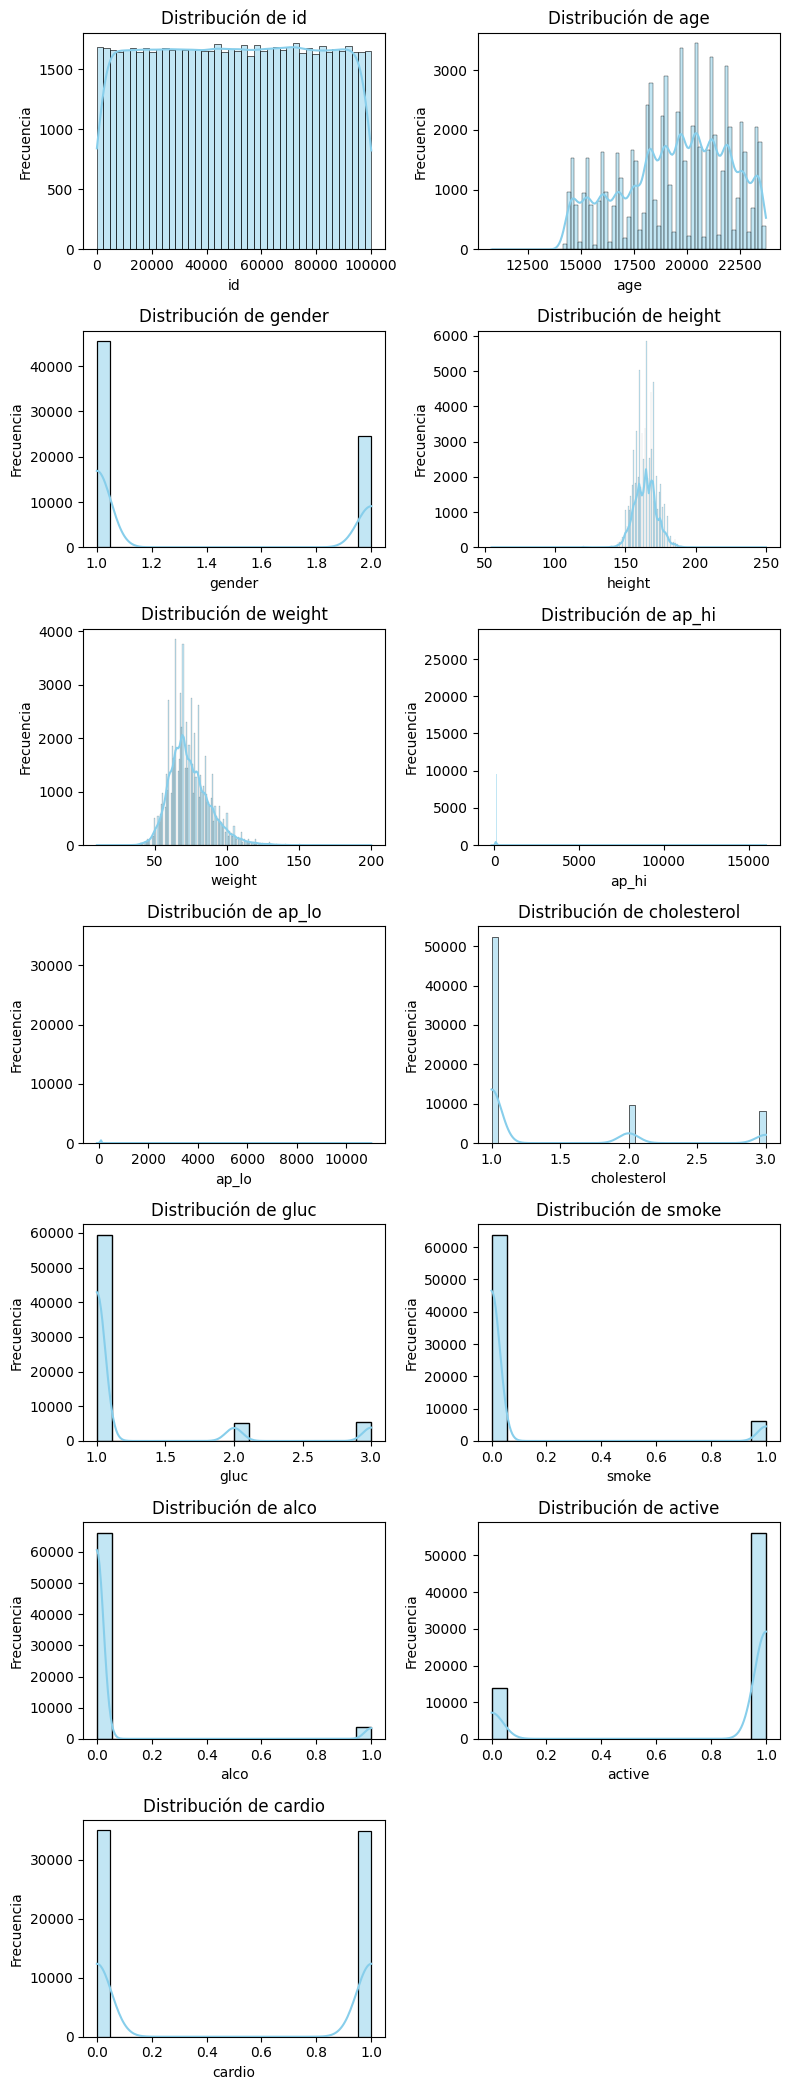

In [ ]:
# Calcular el número de columnas numéricas
num_cols = len(numericas.columns)

# Determinar el número de columnas por fila
cols_per_row = 2

# Calcular el número de filas necesarias
rows_needed = math.ceil(num_cols / cols_per_row)

# Crear los subplots
fig, axs = plt.subplots(rows_needed, cols_per_row, figsize=(cols_per_row * 4, rows_needed * 3)) # Ajustar el tamaño de la figura
axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Iterar sobre las columnas numéricas y la gráfica
for i, col in enumerate(numericas.columns):
    if i < len(axs):
        sns.histplot(df2[col], kde=True, ax=axs[i], color='skyblue', edgecolor='black')
        axs[i].set_title(f'Distribución de {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frecuencia')
    else:
        print(f"Warning: Not enough axes for column {col}")
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])


# Ajustar el diseño
plt.tight_layout()
plt.show()

### Varibale Target

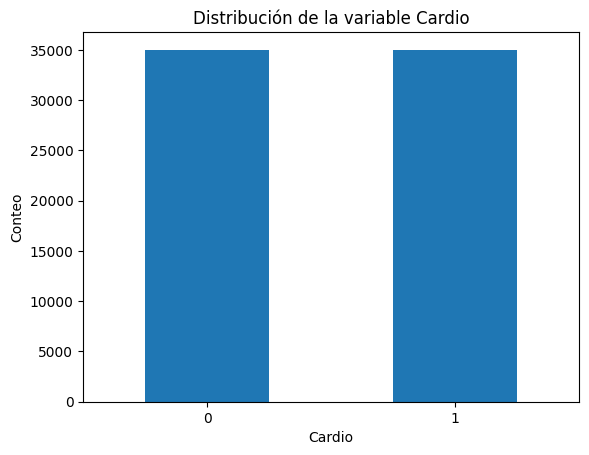

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que tu DataFrame se llama df2 y tiene la columna 'cardio'
df2['cardio'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable Cardio')
plt.xlabel('Cardio')
plt.ylabel('Conteo')
plt.xticks(rotation=0) # Para que las etiquetas del eje x no estén rotadas
plt.show()

## Pruebas de Normalidad

In [ ]:
# Aplicar la prueba de Shapiro-Wilk a cada variable
for variable in numericas:
    print(f'\nPrueba de Shapiro-Wilk para {variable}:')
    stat, p_value = shapiro(numericas[variable])
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print('La variable sigue una distribución normal')
    else:
        print('La variable no sigue una distribución normal')


Prueba de Shapiro-Wilk para id:
Estadístico=0.955, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para age:
Estadístico=0.966, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para gender:
Estadístico=0.603, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para height:
Estadístico=0.963, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para weight:
Estadístico=0.954, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para ap_hi:
Estadístico=0.027, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para ap_lo:
Estadístico=0.073, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para cholesterol:
Estadístico=0.569, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Shapiro-Wilk para gluc:
Estadístico=0.433, p-valo

In [ ]:
# Prueba de Kolmogorov-Smirnov
for variable in numericas:
    print(f'\nPrueba de Kolmogorov-Smirnov para {variable}:')
    stat, p_value = kstest(numericas[variable], 'norm')
    print('Estadístico=%.3f, p-valor=%.6f' % (stat, p_value))
    if p_value > 0.05:
        print('La variable sigue una distribución normal')
    else:
        print('La variable no sigue una distribución normal')


Prueba de Kolmogorov-Smirnov para id:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para age:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para gender:
Estadístico=0.841, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para height:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para weight:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para ap_hi:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para ap_lo:
Estadístico=1.000, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de Kolmogorov-Smirnov para cholesterol:
Estadístico=0.841, p-valor=0.000000
La variable no sigue una distribución normal

Prueba de K

In [ ]:
# Prueba de Anderson-Darling
for variable in numericas:
    print(f'\nPrueba de Anderson-Darling para {variable}:')
    result = anderson(numericas[variable], dist='norm')
    print('Estadístico=%.3f' % result.statistic)
    for i in range(len(result.critical_values)):
        print('Nivel de significancia=%.1f%%: estadístico crítico=%.3f' % (result.significance_level[i], result.critical_values[i]))
        if result.statistic < result.critical_values[i]:
            print('La variable sigue una distribución normal')
        else:
            print('La variable no sigue una distribución normal')


Prueba de Anderson-Darling para id:
Estadístico=774.066
Nivel de significancia=15.0%: estadístico crítico=0.576
La variable no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656
La variable no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787
La variable no sigue una distribución normal
Nivel de significancia=2.5%: estadístico crítico=0.918
La variable no sigue una distribución normal
Nivel de significancia=1.0%: estadístico crítico=1.092
La variable no sigue una distribución normal

Prueba de Anderson-Darling para age:
Estadístico=528.422
Nivel de significancia=15.0%: estadístico crítico=0.576
La variable no sigue una distribución normal
Nivel de significancia=10.0%: estadístico crítico=0.656
La variable no sigue una distribución normal
Nivel de significancia=5.0%: estadístico crítico=0.787
La variable no sigue una distribución normal
Nivel de significancia=2.5%: estadístico crítico=0.918
La variable no sigue una d

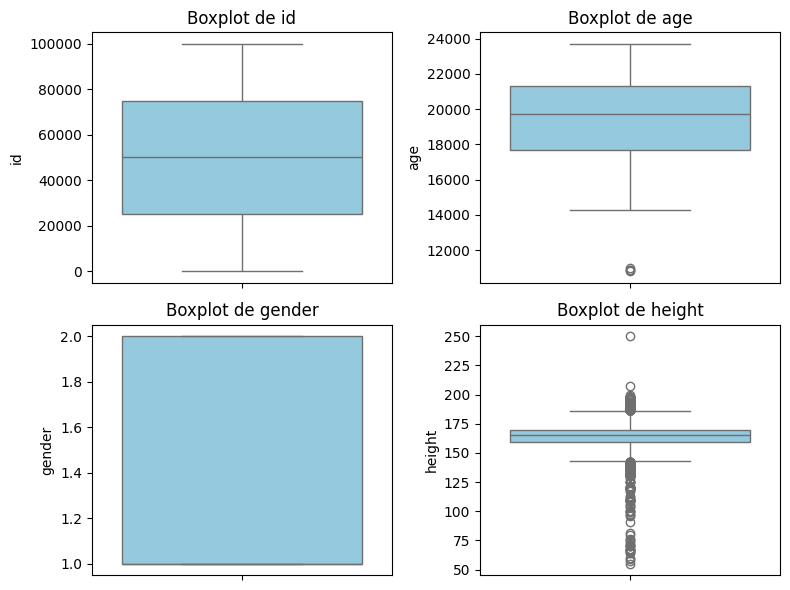

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))  # 2 filas y 2 columnas

axes = axes.flatten()

# Crear un boxplot para cada variable numérica
for ax, col in zip(axes, numericas.columns):
    sns.boxplot(y=df2[col], ax=ax, color='skyblue')
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

In [ ]:
for col in numericas.columns:
    # Calcular z-score para cada columna y obtener su valor absoluto
    z_scores = zscore(df2[col])
    abs_z_scores = np.abs(z_scores)

    # Seleccionar los outliers usando un límite de 3
    outliers_zscore = df2[abs_z_scores > 3]

    # Contar el número de valores atípicos
    num_outliers = outliers_zscore[col].count()

    # Imprimir el nombre de la columna, el valor mínimo del outlier y el número de outliers
    print(f"Variable: {col}")
    print(f"Número de valores atípicos: {num_outliers}")
    if num_outliers > 0:  # Solo imprimir el valor mínimo si hay outliers
        print(f"Outlier mínimo (z-score): {outliers_zscore[col].min()}")
    print("---")

Variable: id
Número de valores atípicos: 0
---
Variable: age
Número de valores atípicos: 4
Outlier mínimo (z-score): 10798
---
Variable: gender
Número de valores atípicos: 0
---
Variable: height
Número de valores atípicos: 293
Outlier mínimo (z-score): 55
---
Variable: weight
Número de valores atípicos: 702
Outlier mínimo (z-score): 10.0
---
Variable: ap_hi
Número de valores atípicos: 38
Outlier mínimo (z-score): 701
---
Variable: ap_lo
Número de valores atípicos: 951
Outlier mínimo (z-score): 700
---
Variable: cholesterol
Número de valores atípicos: 0
---
Variable: gluc
Número de valores atípicos: 5331
Outlier mínimo (z-score): 3
---
Variable: smoke
Número de valores atípicos: 6169
Outlier mínimo (z-score): 1
---
Variable: alco
Número de valores atípicos: 3764
Outlier mínimo (z-score): 1
---
Variable: active
Número de valores atípicos: 0
---
Variable: cardio
Número de valores atípicos: 0
---


In [ ]:
#Matriz de correlación
matriz_correlacion = numericas.corr()

print("Matriz de correlación entre las variables numéricas:")
print(matriz_correlacion)



Matriz de correlación entre las variables numéricas:
                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003457  0.003502 -0.003038 -0.001830  0.003356   
age          0.003457  1.000000 -0.022811 -0.081515  0.053684  0.020764   
gender       0.003502 -0.022811  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081515  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053684  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020764  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017647  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.154424 -0.035821 -0.050226  0.141768  0.023778   
gluc         0.002467  0.098703 -0.020491 -0.018595  0.106857  0.011841   
smoke       -0.003699 -0.047633  0.338135  0.187989  0.067780 -0.000922   
alco         0.001210 -0.029723  0.170966  0.094419  0.067113  0.001408   
active       0.003755 -0.009927  0.005866 -0.00

## Correlaciones

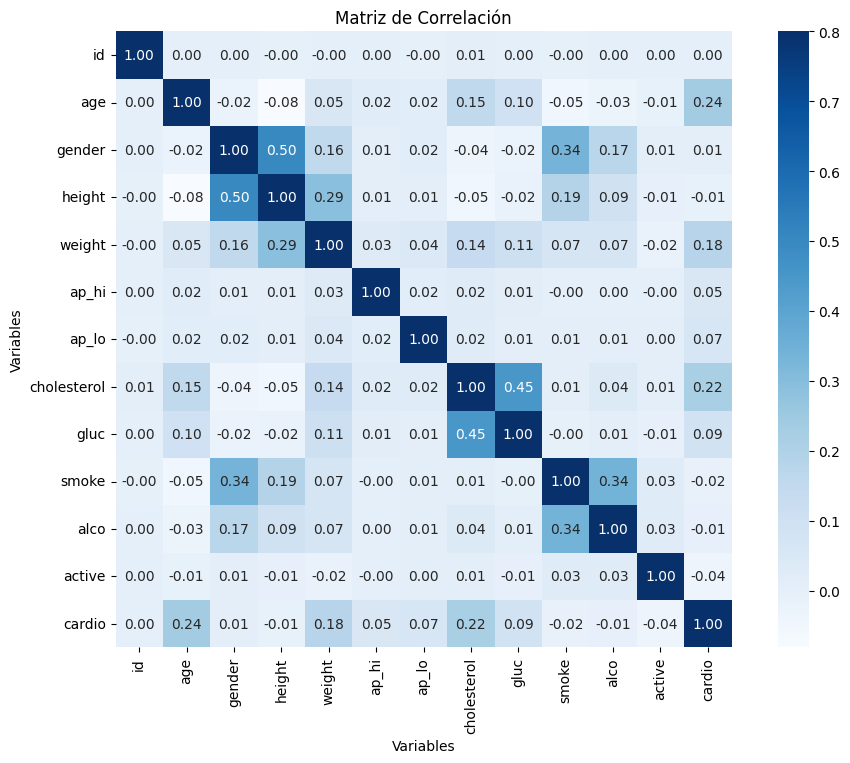

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

# Mostrar la matriz de correlación como mapa de calor
sns.heatmap(matriz_correlacion, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Agregar título y etiquetas
plt.title('Matriz de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Mostrar la figura
plt.show()

# Tratamiento de los datos